<a href="https://colab.research.google.com/github/Lasya-1408/AlmaBetter-Topic-Modeling-Of-News-Articles/blob/main/Topic_Modeling_of_News_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Topic modeling of news articles



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

In this project we are given a collection of BBC news articles which belongs to four different categories (business, sport, tech, entertainment, and politics) in seperate folders. The first step is to aggregate these articles into single dataframe containing category, content, and title. Secondly, we check for missing values, unique terms, and visualize the word count of title and article length in each category to understand the data better. Then we combine all the text data into single column which is used in feature engineering and model building. In feature engineering we do text pre-processing where expand contractions, remove digits, remove white spaces, remove URLs, remove stop words, converting into lower case. Now the text is ready to undergo few changes that a computer can understand the data. It involves tokenization, normalization and vectorization after which we obtain the final document term matrix of the text column. Now this matrix is used in model building using LDA with count vectorizer, LDA with TF-IDF vectorizer, LSA with count vectorizer, and LSA with TF-IDF vectorizer. On observing word cloud and top words in each topic we can understand in which category the topic falls under. Finally, given categories and the topics obtained are verified.

# **GitHub Link -**

https://github.com/Lasya-1408/AlmaBetter-Topic-Modeling-Of-News-Articles

# **Problem Statement**


The project is a collection of BBC news articles. The articles are categorised into 4 types business, sport, tech, entertainment, and politics. These are stored in their respective folders. The task is to aggregate these folders into single dataframe and perform feature engineering, and topic modeling on this dataset. Finally, verify whether these topics correspond to the different tags available.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
# For performing mathematical operations
import numpy as np
import scipy.stats as stats

# For accessing the dataset
import pandas as pd
import os

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Regex
import re

# For text pre processing using NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


# For visualizing word cloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# For topic modeling
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD

### Dataset Loading

In [3]:
# Load Dataset
# Giving access to google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# Since we have multiple datasets instead of a combined dataset, we first have to create a single dataframe.

path = '/content/drive/MyDrive/Datasets_Almabetter/BBC'
folders = ['business', 'entertainment', 'politics', 'sport', 'tech']

# Let column names be News and Type (category)
News = []
Type = []

data={'news':News,'type':Type}
news_df = pd.DataFrame(data)

# extracting text from each folder and creating a dataset
for i in folders:
    files=os.listdir(path+'/'+i)
    for text_doc in files:
        doc_path=path + '/'+i+'/'+text_doc
        with open(doc_path,'rb') as f:
            data = f.read()
        News.append(data)
        Type.append(i)

# Raw dataset from the given files
df = pd.DataFrame({'news':News,'category': Type})


Here we have created the dataset having columns of category and news content. Now we extract title from the text. However, It is not mandatory but it is easy to know what the content is about.

In [5]:
# Extracting title from the news and creating a seperate column for more structured dataset
title = []
content = []
for i in df['news']:
  k = str(i)
  title_index = k.find('\\n\\n')
  title.append(k[2:title_index])
  k = k.replace('\\n\\n', ' ')
  content.append(k[2:])

news_df = pd.DataFrame({'Headline':title, 'Description':content})


We have extracted the title from the content in each document.

In [6]:
# First look of raw dataset after creating title column
news_df

Headline  \
0     Aids and climate top Davos agenda   
1     HealthSouth ex-boss goes on trial   
2      Low-cost airlines hit Eurotunnel   
3     \'Golden economic period\' to end   
4        Europe asks Asia for euro help   
...                                 ...   
2220    Solutions to net security fears   
2221    Bush website blocked outside US   
2222   Microsoft seeking spyware trojan   
2223   Open source leaders slam patents   
2224  Ink helps drive democracy in Asia   

                                            Description  
0     Aids and climate top Davos agenda Climate chan...  
1     HealthSouth ex-boss goes on trial The former h...  
2     Low-cost airlines hit Eurotunnel Channel Tunne...  
3     \'Golden economic period\' to end Ten years of...  
4     Europe asks Asia for euro help European leader...  
...                                                 ...  
2220  Solutions to net security fears Fake bank e-ma...  
2221  Bush website blocked outside US Surfers outsid...  
2222  Microsoft seeking spyware trojan Microsoft is ...  
2223  Open source leaders slam patents The war of wo...  
2224  Ink helps drive democracy in Asia The Kyrgyz R...  

[2225 rows x 2 columns]

In [7]:
news_df['Description'][0]

'Aids and climate top Davos agenda Climate change and the fight against Aids are leading the list of concerns for the first day of the World Economic Forum in the Swiss resort of Davos. Some 2,000 business and political leaders from around the globe will listen to UK Prime Minister Tony Blair\\\'s opening speech on Wednesday. Mr Blair will focus on Africa\\\'s development plans and global warming. Earlier in the day came an update on efforts to have 3 million people on anti-Aids drugs by the end of 2005. The World Health Organisation (WHO) said 700,000 people in poor countries were on life-extending drugs - up from 440,000 six months earlier but amounting to only 12% of the 5.8 million who needed them. A $2bn "funding gap" still stood in the way of hitting the 2005 target, the WHO said. The themes to be stressed by Mr Blair - whose attendance was announced at the last minute - are those he wants to dominate the UK\\\'s chairmanship of the G8 group of industrialised states. Other issues

In [8]:
# Adding category column to the new datset
news_df['Category'] = df['category']

We now merged the category column of df to news_df, Therefore now the dataset has one more extra column.

### Dataset First View

In [9]:
# Dataset First Look
news_df

Headline  \
0     Aids and climate top Davos agenda   
1     HealthSouth ex-boss goes on trial   
2      Low-cost airlines hit Eurotunnel   
3     \'Golden economic period\' to end   
4        Europe asks Asia for euro help   
...                                 ...   
2220    Solutions to net security fears   
2221    Bush website blocked outside US   
2222   Microsoft seeking spyware trojan   
2223   Open source leaders slam patents   
2224  Ink helps drive democracy in Asia   

                                            Description  Category  
0     Aids and climate top Davos agenda Climate chan...  business  
1     HealthSouth ex-boss goes on trial The former h...  business  
2     Low-cost airlines hit Eurotunnel Channel Tunne...  business  
3     \'Golden economic period\' to end Ten years of...  business  
4     Europe asks Asia for euro help European leader...  business  
...                                                 ...       ...  
2220  Solutions to net security fears Fake bank e-ma...      tech  
2221  Bush website blocked outside US Surfers outsid...      tech  
2222  Microsoft seeking spyware trojan Microsoft is ...      tech  
2223  Open source leaders slam patents The war of wo...      tech  
2224  Ink helps drive democracy in Asia The Kyrgyz R...      tech  

[2225 rows x 3 columns]

### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
# Dataset Rows count
print('The number of rows are',len(news_df.index))

# Dataset Columns
print('The number of columns are',len(news_df.columns))

The number of rows are 2225
The number of columns are 3


### Dataset Information

In [11]:
# Dataset Info
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headline     2225 non-null   object
 1   Description  2225 non-null   object
 2   Category     2225 non-null   object
dtypes: object(3)
memory usage: 52.3+ KB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
news_df[news_df.duplicated()]

Headline  \
165    Steady job growth continues in US   
252    Troubled Marsh under SEC scrutiny   
253    S Korea spending boost to economy   
278     Singapore growth at 8.1% in 2004   
287      SEC to rethink post-Enron rules   
...                                  ...   
2205     Britons fed up with net service   
2206  T-Mobile bets on \'pocket office\'   
2213     Millions to miss out on the net   
2214   Sony PSP console hits US in March   
2222    Microsoft seeking spyware trojan   

                                            Description  Category  
165   Steady job growth continues in US The US creat...  business  
252   Troubled Marsh under SEC scrutiny The US stock...  business  
253   S Korea spending boost to economy South Korea ...  business  
278   Singapore growth at 8.1% in 2004 Singapore\'s ...  business  
287   SEC to rethink post-Enron rules The US stock m...  business  
...                                                 ...       ...  
2205  Britons fed up with net service A survey condu...      tech  
2206  T-Mobile bets on \'pocket office\' T-Mobile ha...      tech  
2213  Millions to miss out on the net By 2025, 40% o...      tech  
2214  Sony PSP console hits US in March US gamers wi...      tech  
2222  Microsoft seeking spyware trojan Microsoft is ...      tech  

[100 rows x 3 columns]

In [13]:
print('There are',news_df.duplicated().sum(),'articles which are recorded more than once in the dataset')

There are 100 articles which are recorded more than once in the dataset


Therefore, these duplicates has to be removed as they reduce the performance.

In [14]:
news_df= news_df.drop_duplicates(keep = 'first')
news_df.duplicated().sum()

0

In [15]:
news_df.shape

(2125, 3)

In [16]:
news_df['Category'].value_counts()

business         503
sport            503
politics         403
entertainment    369
tech             347
Name: Category, dtype: int64

#### Missing Values/Null Values

In [17]:
# Missing Values/Null Values Count
news_df.isnull().sum()

Headline       0
Description    0
Category       0
dtype: int64

In [18]:
# Visualizing the missing values
# There are no missing values

### What did you know about your dataset?

* Initally, there are seperate files for business, entertainment, politics, sport, and tech in which news are stored.
* Then we combined these files and created a single dataframe by performing few manipulations from which the dataset has 2225 rows and 3 columns (Headline, Description, and Category).
* Then we found 100 duplicates in the dataset, so we removed them.
* Therefore, now the dataset has 2125 rows and 3 columns.

## ***2. Understanding Your Variables***

In [19]:
# Dataset Columns
news_df.columns

Index(['Headline', 'Description', 'Category'], dtype='object')

In [20]:
# Dataset Describe
news_df.describe()

Headline  \
count                                2125   
unique                               2096   
top     Sun offers processing by the hour   
freq                                    2   

                                              Description  Category  
count                                                2125      2125  
unique                                               2125         5  
top     Aids and climate top Davos agenda Climate chan...  business  
freq                                                    1       503

### Variables Description

In the dataset, we have 3 columns
* Headline - It is the title of the news
* Description - It includes title and content of news
* Category - It is the type of news it belongs to

### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable.
news_df.nunique()

Headline       2096
Description    2125
Category          5
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [22]:
# Write your code to make your dataset analysis ready.
news_df['Description']

0       Aids and climate top Davos agenda Climate chan...
1       HealthSouth ex-boss goes on trial The former h...
2       Low-cost airlines hit Eurotunnel Channel Tunne...
3       \'Golden economic period\' to end Ten years of...
4       Europe asks Asia for euro help European leader...
                              ...                        
2219    Domain system scam fear A system to make it ea...
2220    Solutions to net security fears Fake bank e-ma...
2221    Bush website blocked outside US Surfers outsid...
2223    Open source leaders slam patents The war of wo...
2224    Ink helps drive democracy in Asia The Kyrgyz R...
Name: Description, Length: 2125, dtype: object

### What all manipulations have you done and insights you found?

All the text is stored in a single column named Description so that while performing topic modeling it will be easy to analyze the topics.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1. Distribution of articles over categories

In [23]:
# Chart - 1 visualization code
news_df['Category'].value_counts()

business         503
sport            503
politics         403
entertainment    369
tech             347
Name: Category, dtype: int64

Text(0.5, 1.0, 'Distribution of news over the categories')

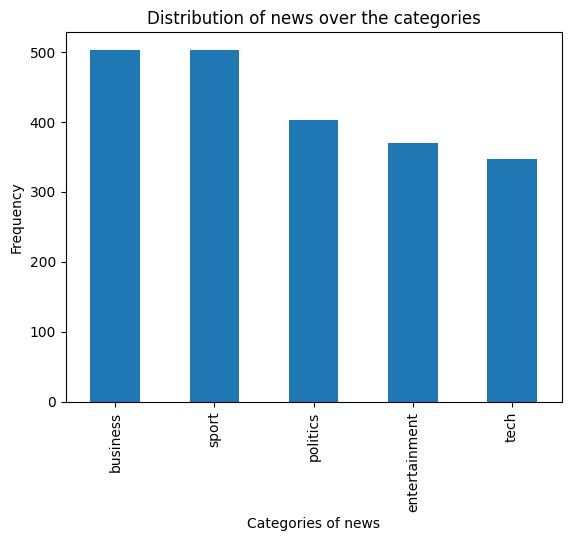

In [24]:
news_df['Category'].value_counts().plot(kind='bar')
plt.xlabel('Categories of news')
plt.ylabel('Frequency')
plt.title('Distribution of news over the categories')

##### 1. Why did you pick the specific chart?

A bar plot is used when there are categorical variables. Here as we are having categorical variable in which there are more than 2 categories, we choose bar plot for visualization.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, we observe that the article majorly consists of both sports and business news followed by politics, tech, and entertainment.

#### Chart - 2. Word cloud of Headline column

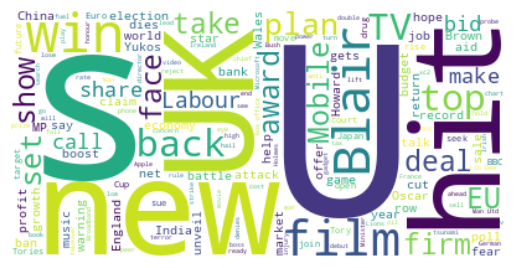

In [25]:
# Chart - 2 visualization code
df_word_cloud = news_df['Headline']
text = " ".join(word for word in df_word_cloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

A word cloud plot is a visual representation of text data where the size of each word indicates its frequency or importance in the given text. Hence to understand the most frequent words used in the headline, we choose word cloud.

##### 2. What is/are the insight(s) found from the chart?

From the plot, we see that words like US, UK, hit, win, new and so on are the most frequent words in the title.

#### Chart - 3. Article length of categories

<Figure size 1200x600 with 0 Axes>

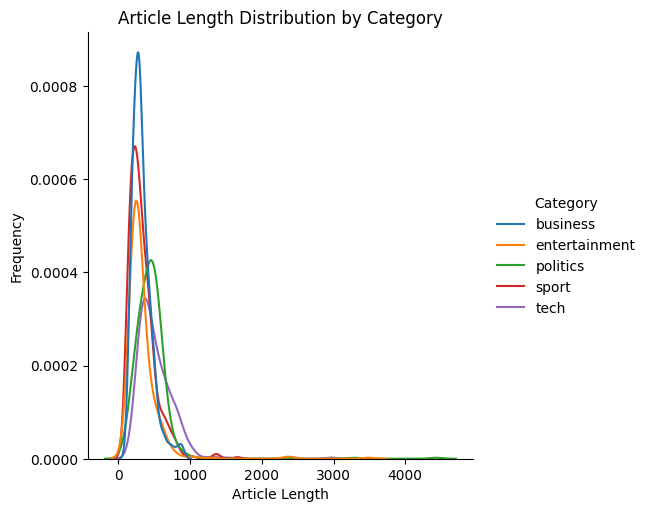

In [26]:
# Chart - 3 visualization code

# Plotting article length for each category
plt.figure(figsize=(12, 6))
colors = ['b', 'g', 'r', 'c', 'm']  # You can add more colors if needed

sns.displot(x = news_df['Description'].str.split(" ").apply(len), hue = news_df['Category'], kind = 'kde')

plt.title('Article Length Distribution by Category')
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

Article length is a continous variable. Hence, to understand under which category the article length is maximum, we choose distribution plot.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, we see that article length is maximum under politics category followed by entertainment and comes remaining.

## ***6. Feature Engineering & Data Pre-processing***

To make sure the original content is not lost we create a copy of the dataset.

In [27]:
news_copy = news_df.copy()

In [28]:
news_copy['Description']

0       Aids and climate top Davos agenda Climate chan...
1       HealthSouth ex-boss goes on trial The former h...
2       Low-cost airlines hit Eurotunnel Channel Tunne...
3       \'Golden economic period\' to end Ten years of...
4       Europe asks Asia for euro help European leader...
                              ...                        
2219    Domain system scam fear A system to make it ea...
2220    Solutions to net security fears Fake bank e-ma...
2221    Bush website blocked outside US Surfers outsid...
2223    Open source leaders slam patents The war of wo...
2224    Ink helps drive democracy in Asia The Kyrgyz R...
Name: Description, Length: 2125, dtype: object

In [29]:
news_copy['Description'][0]

'Aids and climate top Davos agenda Climate change and the fight against Aids are leading the list of concerns for the first day of the World Economic Forum in the Swiss resort of Davos. Some 2,000 business and political leaders from around the globe will listen to UK Prime Minister Tony Blair\\\'s opening speech on Wednesday. Mr Blair will focus on Africa\\\'s development plans and global warming. Earlier in the day came an update on efforts to have 3 million people on anti-Aids drugs by the end of 2005. The World Health Organisation (WHO) said 700,000 people in poor countries were on life-extending drugs - up from 440,000 six months earlier but amounting to only 12% of the 5.8 million who needed them. A $2bn "funding gap" still stood in the way of hitting the 2005 target, the WHO said. The themes to be stressed by Mr Blair - whose attendance was announced at the last minute - are those he wants to dominate the UK\\\'s chairmanship of the G8 group of industrialised states. Other issues

### **1. Textual Data Preprocessing**
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### **1.1 Expand Contraction** - Contractions are shortened versions of words or phrases that often involve the omission of one or more letters. Here, we try to expand these words if present in our dataset.

In [30]:
# Expand Contraction
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 15.4 MB/s eta 0:00:00


In [31]:
import contractions

# Function for expanding contracted words
def expand_contractions(sentence):

  # New list to store the expanded words
  words_after_expanding = []

  # first the sentence in the column is split into words and then each word is expanded if required
  for word in sentence.split():
    words_after_expanding.append(contractions.fix(word))

  # Rejoining the sentence with expanded words
  return ' '.join(words_after_expanding)

# Applying the expanded contraction function to the Description column
news_copy['Description'] = news_copy['Description'].apply(expand_contractions)


In [32]:
news_copy['Description'][0]

'Aids and climate top Davos agenda Climate change and the fight against Aids are leading the list of concerns for the first day of the World Economic Forum in the Swiss resort of Davos. Some 2,000 business and political leaders from around the globe will listen to UK Prime Minister Tony Blair\\\'s opening speech on Wednesday. Mr Blair will focus on Africa\\\'s development plans and global warming. Earlier in the day came an update on efforts to have 3 million people on anti-Aids drugs by the end of 2005. The World Health Organisation (WHO) said 700,000 people in poor countries were on life-extending drugs - up from 440,000 six months earlier but amounting to only 12% of the 5.8 million who needed them. A $2bn "funding gap" still stood in the way of hitting the 2005 target, the WHO said. The themes to be stressed by Mr Blair - whose attendance was announced at the last minute - are those he wants to dominate the UK\\\'s chairmanship of the G8 group of industrialised states. Other issues

####**1.2. Lower Casing** - Converting all the words to lower case so that consistency is maintained among all the texts.

In [33]:
# Function to convert sentence to lower case
def convert_to_lower(sentence):
  return sentence.lower()

# Applying convert_to_lower function to description column
news_copy['Description'] = news_copy['Description'].apply(convert_to_lower)

In [34]:
news_copy['Description'][0]

'aids and climate top davos agenda climate change and the fight against aids are leading the list of concerns for the first day of the world economic forum in the swiss resort of davos. some 2,000 business and political leaders from around the globe will listen to uk prime minister tony blair\\\'s opening speech on wednesday. mr blair will focus on africa\\\'s development plans and global warming. earlier in the day came an update on efforts to have 3 million people on anti-aids drugs by the end of 2005. the world health organisation (who) said 700,000 people in poor countries were on life-extending drugs - up from 440,000 six months earlier but amounting to only 12% of the 5.8 million who needed them. a $2bn "funding gap" still stood in the way of hitting the 2005 target, the who said. the themes to be stressed by mr blair - whose attendance was announced at the last minute - are those he wants to dominate the uk\\\'s chairmanship of the g8 group of industrialised states. other issues

As we can see that the complete text is converted to lower case.

#### **1.3. Removing Punctuations** - To remove punctuations in the text column.

In [35]:
import re
# Function to remove punctuations using regex
def remove_punctuations(sentence):
  return re.sub(r'\W',' ',sentence)

# Applying remove_punctuations_regex function to column
news_copy['Description'] = news_copy['Description'].apply(remove_punctuations)

In [36]:
news_copy['Description'][0]

'aids and climate top davos agenda climate change and the fight against aids are leading the list of concerns for the first day of the world economic forum in the swiss resort of davos  some 2 000 business and political leaders from around the globe will listen to uk prime minister tony blair  s opening speech on wednesday  mr blair will focus on africa  s development plans and global warming  earlier in the day came an update on efforts to have 3 million people on anti aids drugs by the end of 2005  the world health organisation  who  said 700 000 people in poor countries were on life extending drugs   up from 440 000 six months earlier but amounting to only 12  of the 5 8 million who needed them  a  2bn  funding gap  still stood in the way of hitting the 2005 target  the who said  the themes to be stressed by mr blair   whose attendance was announced at the last minute   are those he wants to dominate the uk  s chairmanship of the g8 group of industrialised states  other issues to be

From above text, we notice that there are no punctuations or any extra characters.

#### **1.4. Removing URLs & Removing digits** - We remove URLs if present and alos digits so that we have only words in the text.

In [37]:
# Checking whether the dataset has any URLs in it
news_copy['Description'].str.contains('http').sum()

0

Hence there are no URLs in the given dataset.

In [38]:
# Function to remove digits
def remove_digits(sentence):
  return re.sub(r'\d',' ',sentence)

# Applying remove_digits function to the description column
news_copy['Description'] = news_copy['Description'].apply(remove_digits)

In [39]:
news_copy['Description'][0]

'aids and climate top davos agenda climate change and the fight against aids are leading the list of concerns for the first day of the world economic forum in the swiss resort of davos  some       business and political leaders from around the globe will listen to uk prime minister tony blair  s opening speech on wednesday  mr blair will focus on africa  s development plans and global warming  earlier in the day came an update on efforts to have   million people on anti aids drugs by the end of       the world health organisation  who  said         people in poor countries were on life extending drugs   up from         six months earlier but amounting to only     of the     million who needed them  a   bn  funding gap  still stood in the way of hitting the      target  the who said  the themes to be stressed by mr blair   whose attendance was announced at the last minute   are those he wants to dominate the uk  s chairmanship of the g  group of industrialised states  other issues to be

Here we see that the digits are removed from the text which is why there are white spaces in the content. These spaces are removed in next section.

#### **1.5. Removing Stopwords & Removing White spaces** - We remove stop words which are more frequently used words in a sentence and also removing white spaces.

In [40]:
#Function to whitespaces
def remove_whitespace(sentence):
  return re.sub(r'\s+',' ',sentence)

# Applying remove_whitespace function to the description column
news_copy['Description'] = news_copy['Description'].apply(remove_whitespace)

In [41]:
news_copy['Description'][0]

'aids and climate top davos agenda climate change and the fight against aids are leading the list of concerns for the first day of the world economic forum in the swiss resort of davos some business and political leaders from around the globe will listen to uk prime minister tony blair s opening speech on wednesday mr blair will focus on africa s development plans and global warming earlier in the day came an update on efforts to have million people on anti aids drugs by the end of the world health organisation who said people in poor countries were on life extending drugs up from six months earlier but amounting to only of the million who needed them a bn funding gap still stood in the way of hitting the target the who said the themes to be stressed by mr blair whose attendance was announced at the last minute are those he wants to dominate the uk s chairmanship of the g group of industrialised states other issues to be discussed at the five day conference range from china s economic 

From the text we observe that there are no white spaces in the text. Now we try to remove stop words which are more frequently used words.

In [42]:
# Remove Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [43]:
# These are the stopwords which are to be removed
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [44]:
# Function to remove stopwords from the column
def remove_stopwords(sentence, stop_words):

  # Removes stopwords  from sentence by splitting it into words
  sentence = [word for word in sentence.split() if word.lower() not in stop_words]

 # Rejoining the sentences
  return ' '.join(sentence)

news_copy['Description'] = news_copy['Description'].apply(remove_stopwords, stop_words = stop_words)

In [45]:
news_copy['Description'][0]

'aids climate top davos agenda climate change fight aids leading list concerns first day world economic forum swiss resort davos business political leaders around globe listen uk prime minister tony blair opening speech wednesday mr blair focus africa development plans global warming earlier day came update efforts million people anti aids drugs end world health organisation said people poor countries life extending drugs six months earlier amounting million needed bn funding gap still stood way hitting target said themes stressed mr blair whose attendance announced last minute wants dominate uk chairmanship g group industrialised states issues discussed five day conference range china economic power iraq future sunday elections aside mr blair world leaders expected attend including french president jacques chirac due speak video link bad weather delayed helicopter south african president thabo mbeki whose arrival delayed ivory coast peace talks ukraine new president viktor yushchenko 

We removed stop words from the content as they effect the output while performing model building.

#### **1.6. Tokenization** - It is a process of breaking down the sentence into words (tokens) so that model building is easy to perform and we can also count the frequency of each word so that we can plot top most frequently used words in the whole text column. It is performed using count_vectorizer technique.

In [46]:
# Function to give top n most frequently used words
def top_n_frequent_words(count_vectorizer, sentence, top_n_words):

    # Given sentence is vectorised
    vectorized_sentence = count_vectorizer.fit_transform(sentence)

    # Vectorized sentence is converted into a Pandas DataFrame.
    # Each column in the DataFrame corresponds to a unique term.
    # Each row represents the vectorized representation of the sentence for that term.
    words_df = pd.DataFrame(vectorized_sentence.todense(), columns = count_vectorizer.get_feature_names_out())

    # The occurances of each word is counted and stored in the descending order in top_words_df dataframe
    top_words_df = pd.DataFrame(words_df.sum().sort_values(ascending=False).head(top_n_words)).rename(columns = {0:'Occurences'})

    # returns the dataframe and length of unique terms from the sentence
    return top_words_df, len(count_vectorizer.get_feature_names_out())

In [47]:
# Initialising count vectorizer
count_vectorizer = CountVectorizer()

# Extracting top n words for visualization
top_words, n_features_raw = top_n_frequent_words(count_vectorizer, news_copy['Description'], 10)

<Axes: >

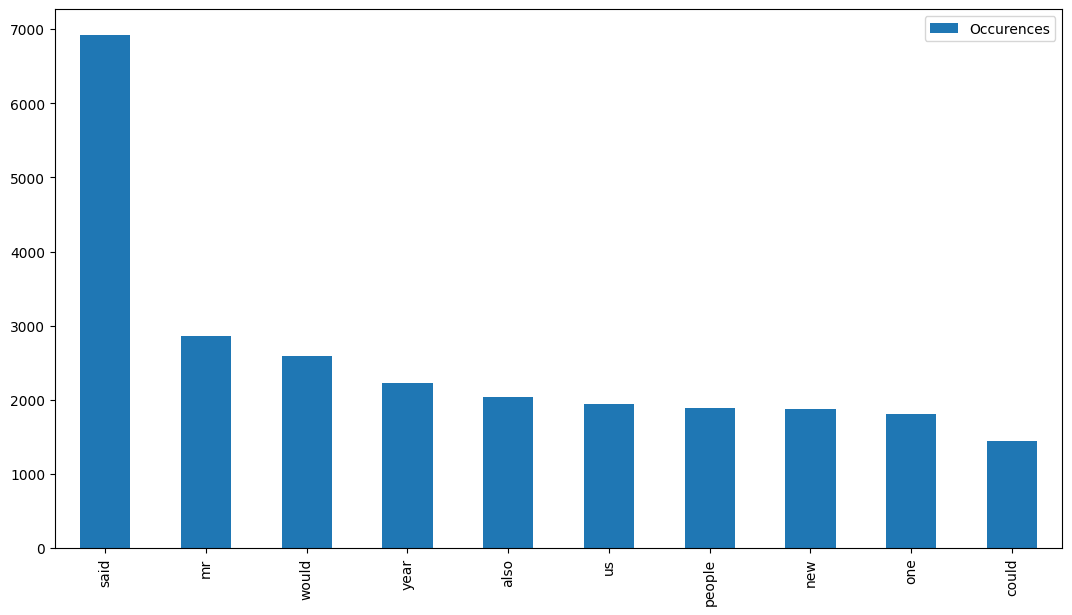

In [48]:
# plot of top 10 frequently used words
top_words.plot(kind='bar', figsize = (13,7))

* Intially we have tokenised the text using count vectorizer and calculated the most frequently used words in the given content after removing stop words.
* From the above plot, we observe that " said, mr, would, also, us, new, people, one, year, could, last, first, years, two, and time " are the top 15 most frequently used words in the description column.

In [49]:
n_features_raw

27721

#### **1.7. Text Normalization** - It is a process of normalizing the texts using lemmatization technique. It replaces a bunch of similar words with a single word.

In [50]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
!pip install nltk

In [51]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [52]:
# Function to lemmatize using wordnetlemmatizer
def lemmatize_(sentence, lemmatizer):

  # lemmatizer is applied to sentence by splitting into words
  sentence = [lemmatizer.lemmatize(word, pos='v') for word in sentence.split()]

  # Rejoin the sentence
  return ' '.join(sentence)

lemmatiser =  WordNetLemmatizer()


news_copy['Description'] = news_copy['Description'].apply(lemmatize_, lemmatizer = lemmatiser)

In [53]:
news_copy['Description'][0]

'aid climate top davos agenda climate change fight aid lead list concern first day world economic forum swiss resort davos business political leaders around globe listen uk prime minister tony blair open speech wednesday mr blair focus africa development plan global warm earlier day come update efforts million people anti aid drug end world health organisation say people poor countries life extend drug six months earlier amount million need bn fund gap still stand way hit target say theme stress mr blair whose attendance announce last minute want dominate uk chairmanship g group industrialise state issue discuss five day conference range china economic power iraq future sunday elections aside mr blair world leaders expect attend include french president jacques chirac due speak video link bad weather delay helicopter south african president thabo mbeki whose arrival delay ivory coast peace talk ukraine new president viktor yushchenko also newly elect palestinian leader mahmoud abbas sh

In [54]:
# Removing extra most frequently used words from the dataset
stop_words.update(['say', 'mr', 'would', 'also'])
news_copy['Description'] = news_copy['Description'].apply(remove_stopwords, stop_words = stop_words)

<Axes: >

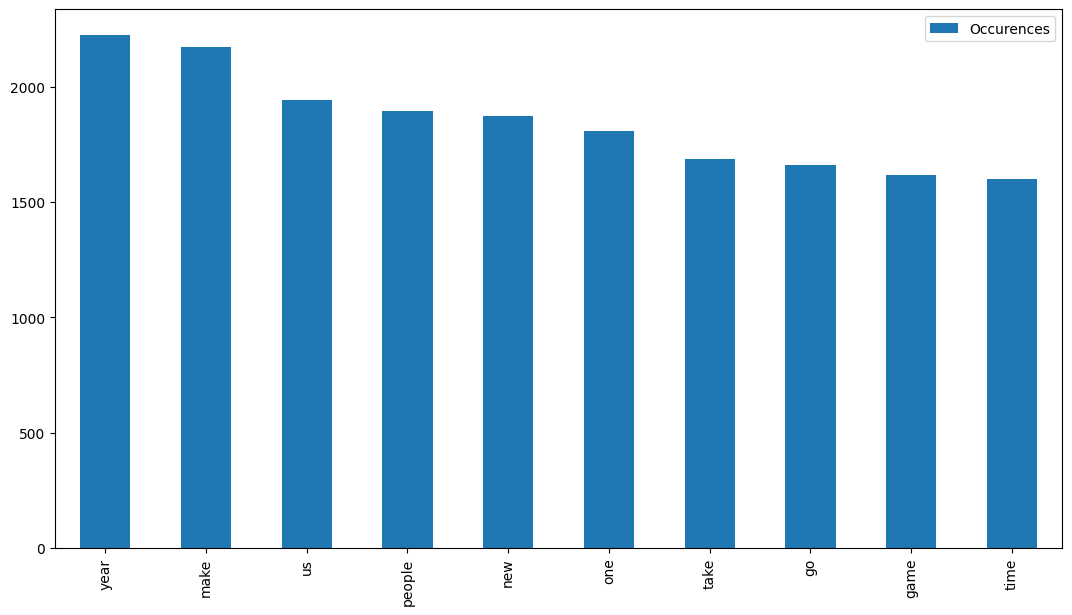

In [55]:
top_n_frequent_words(count_vectorizer, news_copy['Description'], 10)[0].plot(kind='bar', figsize = (13,7))

From the above plot we see that the top 10 most frequent words in the entire text column are year, make, us, people, new, one, take, go, game, and time.

##### Which text normalization technique have you used and why?

Here we used lemmatization technique to perform normalization. It involves reducing words to their base or dictionary form, known as the lemma while other techniques doesn't reduce the similar words to a meaningful word.

#### **1.8. Text Vectorization** - Converting text into document term matrix which has the word counts in each text. This resultant matrix is used in model building.

In [56]:
n_features_raw

27721

There are 27721 unique words before vectorization

In [57]:
# Using count vectorizer
vectorizer_cv = CountVectorizer(max_df = 0.95, min_df = 0.02)
document_term_matrix = vectorizer_cv.fit_transform(news_copy['Description'])

In [58]:
top_words, n_features = top_n_frequent_words(vectorizer_cv, news_copy['Description'], 10)

In [59]:
n_features

1448

Here we can say that there is a huge difference in number of features between before and after vectorization.

In [60]:
# Using TF-IDF vectorizer
vectorizer_TFIDF = TfidfVectorizer(max_df = 0.95, min_df = 0.02)
doc_matrix_TFIDF = vectorizer_TFIDF.fit_transform(news_copy['Description'])

##### Which text vectorization technique have you used and why?

Here we used count vectorization and TF-IDF techniques. They are versatile techniques applicable to various NLP tasks, including text classification, clustering, and information retrieval. It is computationally effecient and simple technique.

## ***7. ML Model Implementation***

### **ML Model - 1.** Latent Dirichlet Allocation (LDA)


LDA is a generative probabilistic model used in natural language processing (NLP) and topic modeling. It is designed to uncover latent topics within a collection of text documents. LDA is applied to the vectorized text data to identify topics and their associated word distributions.
* Assumptions:
1. Each document is assumed to be a mix of various topics.
2. Each topic is assumed to be a mix of words.
* By analyzing the documents, LDA aims to derive the underlying topics and their associated word distributions.  
* The output of LDA includes the identified topics, the distribution of topics in each document, and the distribution of words in each topic.

### 1.1 LDA using Count vectorizer

In [61]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

LDA_HP = LatentDirichletAllocation(random_state=42)

# Varying n_components from 5 to 15
param_grid = {'n_components': list(range(5,15))}

LDA_model = GridSearchCV(LDA_HP, param_grid = param_grid)

# Fit the Algorithm
LDA_model.fit(document_term_matrix)

GridSearchCV(estimator=LatentDirichletAllocation(random_state=42),
             param_grid={'n_components': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]})

##### Which hyperparameter optimization technique have you used and why?

Here we used GridSearchCV technique to perform hyperparameter tuning. We varied number of topics starting from 5 to 15 as the default was 5 from the given dataset.

In [62]:
# The optimal number of topics
lda_optimal_model = LDA_model.best_params_
print(lda_optimal_model)
# Best estimator
lda_model_est = LDA_model.best_estimator_
print(lda_model_est)

{'n_components': 5}
LatentDirichletAllocation(n_components=5, random_state=42)


In [63]:
# Representing the distribution of topics for each document in the column.
doc_topic_distribution = LDA_model.transform(document_term_matrix)

In [64]:
# Assign each document to the most relevant topic using np.argmax()
assigned_topics = [np.argmax(topic_distribution) for topic_distribution in doc_topic_distribution]

# Creating a DataFrame with assigned topics
news_LDA = pd.DataFrame({"Document": news_copy['Description'], "Assigned Topic": assigned_topics})
print(news_LDA)

                                               Document  Assigned Topic
0     aid climate top davos agenda climate change fi...               4
1     healthsouth ex boss go trial former head us me...               4
2     low cost airlines hit eurotunnel channel tunne...               4
3     golden economic period end ten years golden ec...               4
4     europe ask asia euro help european leaders asi...               4
...                                                 ...             ...
2219  domain system scam fear system make easier cre...               3
2220  solutions net security fear fake bank e mail p...               3
2221  bush website block outside us surfers outside ...               3
2223  open source leaders slam patent war word micro...               3
2224  ink help drive democracy asia kyrgyz republic ...               2

[2125 rows x 2 columns]


In [65]:
# Adding category and headline columns from news_copy dataset to news_LDA dataset
news_LDA['Category'] = news_copy['Category']
news_LDA['Title'] = news_copy['Headline']
news_LDA.head(10)

Document  Assigned Topic  \
0  aid climate top davos agenda climate change fi...               4   
1  healthsouth ex boss go trial former head us me...               4   
2  low cost airlines hit eurotunnel channel tunne...               4   
3  golden economic period end ten years golden ec...               4   
4  europe ask asia euro help european leaders asi...               4   
5  uk young top euro earn league british children...               4   
6  us budget deficit reach bn us budget deficit s...               4   
7  eu probe alitalia state aid european commissio...               4   
8  imf agree fresh turkey fund turkey agree draft...               4   
9  swiss cement firm buy spree swiss cement firm ...               4   

   Category                               Title  
0  business   Aids and climate top Davos agenda  
1  business   HealthSouth ex-boss goes on trial  
2  business    Low-cost airlines hit Eurotunnel  
3  business   \'Golden economic period\' to end  
4  business      Europe asks Asia for euro help  
5  business   UK young top Euro earnings league  
6  business   US budget deficit to reach $368bn  
7  business  EU to probe Alitalia \'state aid\'  
8  business     IMF agrees fresh Turkey funding  
9  business   Swiss cement firm in buying spree

In [66]:
# Representing the count of topic with respect to title
news_LDA.groupby(['Category', 'Assigned Topic'])['Title'].count()

Category       Assigned Topic
business       0                   1
               2                  32
               3                  10
               4                 460
entertainment  1                 326
               2                  25
               3                  12
               4                   6
politics       0                   1
               1                  34
               2                 334
               3                   2
               4                  32
sport          0                 476
               1                   2
               2                  22
               4                   3
tech           0                   7
               1                   4
               2                  12
               3                 319
               4                   5
Name: Title, dtype: int64

From above output, we observed that the following are the topics which are equivalent to the given categories
* 0 - sport
* 1 - entertainment
* 2 - politics
* 3 - tech
* 4 - business
* We will try to confirm the topics from word cloud and words weightage in each topic.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [67]:
# Perplexity
perplexity_lda_cv = lda_model_est.perplexity(document_term_matrix)
print('The perlexity score is', perplexity_lda_cv)

# Log likelihood
log_likelihood_lda_cv = LDA_model.best_score_
print('The log likelihood is ', log_likelihood_lda_cv)

The perlexity score is 748.6208312641731
The log likelihood is  -454149.31812669215


In [68]:
# Visualizing using wordcloud

vocab = vectorizer_cv.get_feature_names_out()

# Generate a word cloud image for given topic
def word_cloud_LDA(index):
  imp_words_topic=""
  comp=lda_model_est.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:100]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400,max_font_size=100).generate(imp_words_topic)
  plt.figure( figsize=(12,6))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

In [69]:
# Get the term-topic distribution matrix
term_topic_matrix = lda_model_est.components_

# Get the weights for the top words in the specified topic
def topic_top_words(topic_index):

  top_words_indices = term_topic_matrix[topic_index].argsort()[-20:][::-1]
  top_words = [(vocab[i], term_topic_matrix[topic_index][i]) for i in top_words_indices]

  return dict(top_words)


#### Topic 0:

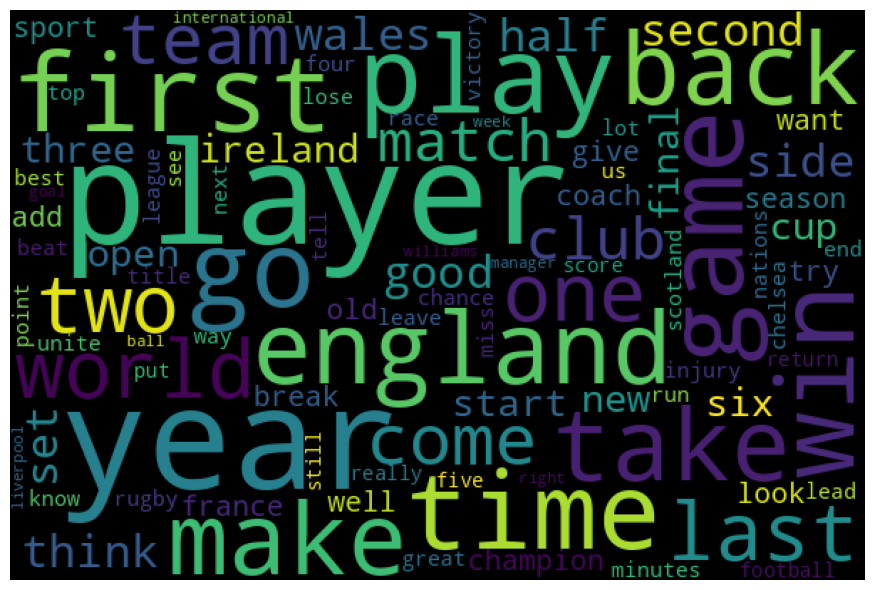

{'game': 841.2184464884168,
 'play': 747.9342421033282,
 'win': 647.5160514596282,
 'go': 608.0182222259979,
 'time': 586.395416044778,
 'get': 559.6553682957493,
 'first': 557.4896097312943,
 'year': 521.5471422041979,
 'england': 516.3307491553164,
 'take': 497.38165973902807,
 'make': 479.9085857500197,
 'back': 466.4056992691008,
 'world': 455.6072301960601,
 'two': 445.4772063139213,
 'one': 437.0117755928594,
 'last': 436.01419058236223,
 'team': 396.50973964077775,
 'come': 395.2123241233201,
 'match': 391.54526404111647,
 'club': 387.20107775503226}

In [70]:
word_cloud_LDA(0)
topic_top_words(0)

From the above word cloud and the topic term matrix, we see that the maximum weightage is given to 'game, play, win, go, time, get,' and so on. Therefore, from this we can conclude that the topic is about sport.

#### Topic 1:

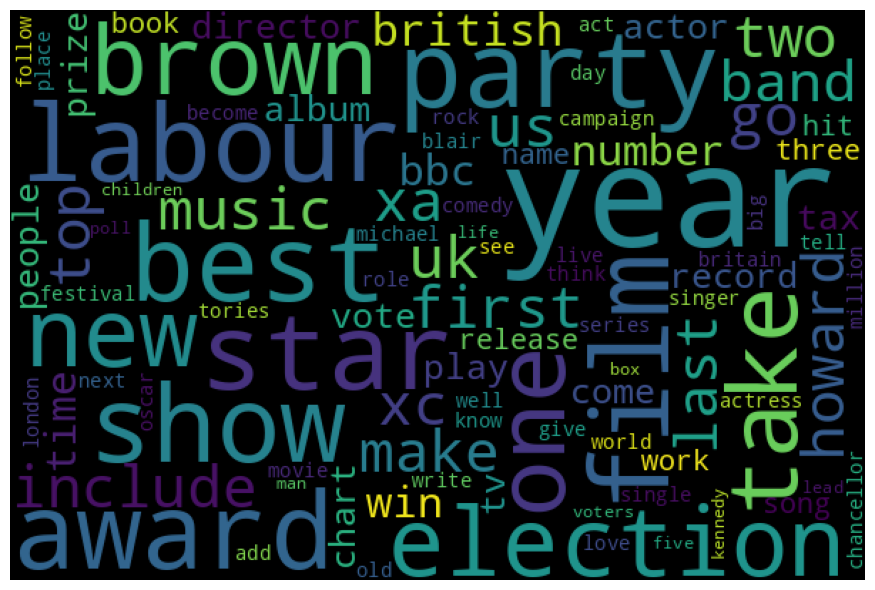

{'film': 1019.1769836018526,
 'best': 667.1906896274868,
 'award': 627.380700309585,
 'show': 527.1687944364484,
 'labour': 496.8828668176955,
 'year': 477.95902975965856,
 'party': 475.675711922489,
 'star': 453.8839980177873,
 'election': 441.74210754625005,
 'one': 417.53532954803615,
 'brown': 394.97941437305417,
 'new': 354.7848524321118,
 'take': 354.2678614559445,
 'include': 352.4178180709064,
 'make': 345.53766589333253,
 'music': 331.665706908624,
 'go': 308.01610798872895,
 'us': 303.20124978281,
 'top': 273.5364624522573,
 'first': 267.726218666198}

In [72]:
word_cloud_LDA(1)
topic_top_words(1)

From the above word cloud and the topic term matrix, we see that the maximum weightage is given to 'film, best, award, show,' and so on. Therefore, from this we can conclude that the topic is about entertainment.

#### Topic 2:

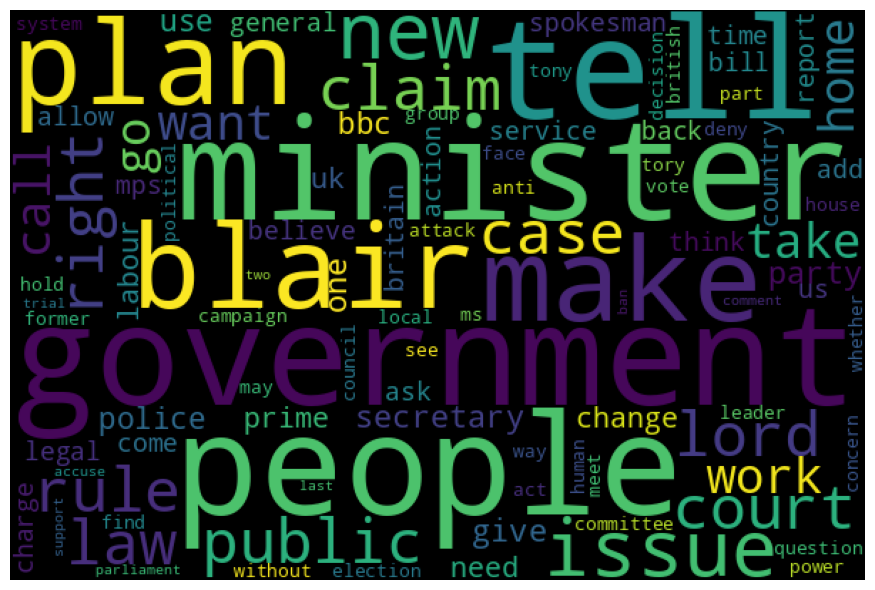

{'government': 878.0345460037331,
 'people': 636.9297689666132,
 'minister': 608.7953958730226,
 'tell': 506.0598937111106,
 'plan': 487.83025036716555,
 'could': 457.3672765379909,
 'make': 452.75026016206226,
 'blair': 429.646230202438,
 'issue': 396.0839740477841,
 'new': 368.7607348975367,
 'public': 361.98367238366177,
 'lord': 360.5535744578867,
 'right': 356.39596788456936,
 'claim': 355.7944729237839,
 'court': 346.904328622591,
 'rule': 333.68485657848277,
 'law': 325.1438188855088,
 'case': 315.7057776026905,
 'work': 309.1843847523204,
 'take': 299.2952497545461}

In [73]:
word_cloud_LDA(2)
topic_top_words(2)

From the above word cloud and the topic term matrix, we can say that the collection of words belongs to politics.

From the above word cloud and the topic term matrix, we see that the maximum weightage is given to 'government, people, minister,' and so on. Therefore, from this we can conclude that the topic is about politics.

#### Topic 3:

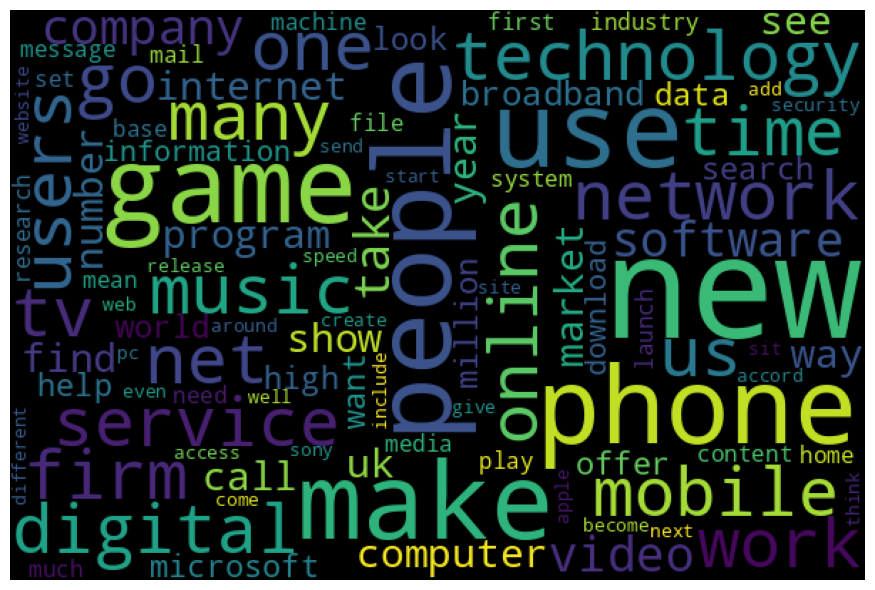

{'use': 981.4416794490178,
 'people': 908.7482049311548,
 'game': 776.0763121424388,
 'make': 569.362343938466,
 'phone': 560.5728182603611,
 'technology': 493.1546547179455,
 'mobile': 491.19374367346796,
 'new': 449.369199280659,
 'service': 448.4120857609146,
 'one': 444.09483944162236,
 'get': 433.73263733864763,
 'music': 421.3330218349251,
 'could': 415.15691509228907,
 'network': 366.4490374198267,
 'net': 357.0277334693686,
 'users': 352.1985304451427,
 'like': 347.11995874670663,
 'work': 341.1569583597343,
 'many': 333.9357236087187,
 'digital': 331.28929356769714}

In [74]:
word_cloud_LDA(3)
topic_top_words(3)

From the above word cloud and the topic term matrix, we see that the maximum weightage is given to 'use, people, game, make, phone, technology, mobile' and so on. Therefore, from this we can conclude that the topic is about tech.

#### Topic 4:

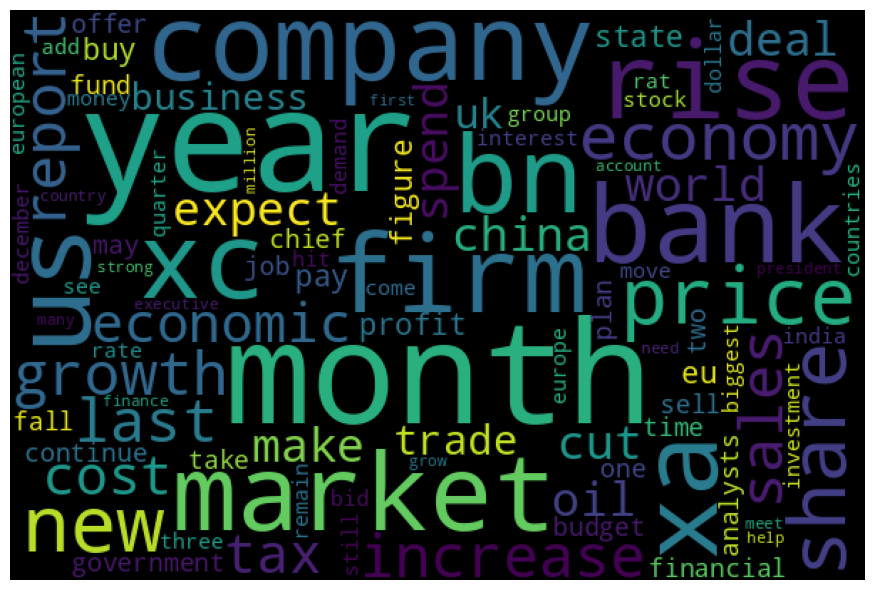

{'xa': 1004.608277823207,
 'xc': 1003.5565528821077,
 'bn': 943.8804593533602,
 'us': 916.793352453142,
 'year': 876.933817607825,
 'company': 712.4362607262603,
 'market': 612.5160983697724,
 'rise': 570.6713303620523,
 'firm': 549.9212435718621,
 'bank': 526.5452247242991,
 'price': 459.1255947336194,
 'share': 458.44674887036325,
 'new': 409.7270578900606,
 'economy': 407.5355210931864,
 'growth': 405.68029450354794,
 'last': 399.7738784529232,
 'increase': 373.96000228765206,
 'sales': 372.43149002116866,
 'report': 367.8544669732066,
 'economic': 366.54629100943407}

In [75]:
word_cloud_LDA(4)
topic_top_words(4)

From the above word cloud and the topic term matrix, we see that the maximum weightage is given to 'xa, xc, bn, us, year, company, market, rise, firm,' and so on. Therefore, from this we can conclude that the topic is about business.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

* The perlexity score is 748.6208312641731
* The log likelihood is  -454149.31812669215

A perplexity score of 748 is good for an LDA model. This score means the model is doing well at figuring out the main topics and how words are used in the documents. For businesses relying on market research, customer feedback analysis, or trend detection will benefit from this model that accurately identifies and represents relevant topics. Using LDA to organize content, make summaries, or understand themes in big sets of text, a lower perplexity score shows that the model is giving accurate and clear topic information.

### 1.1 LDA using  TF-IDF vectorizer

In [76]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

# Fit the Algorithm
LDA_tfidf = LatentDirichletAllocation(random_state=42)

# Varying n_components from 5 to 15
param_grid = {'n_components': list(range(5,15))}

LDA_model_tfidf = GridSearchCV(LDA_tfidf, param_grid = param_grid)

# Fit the Algorithm
LDA_model_tfidf.fit(doc_matrix_TFIDF)


GridSearchCV(estimator=LatentDirichletAllocation(random_state=42),
             param_grid={'n_components': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]})

##### Which hyperparameter optimization technique have you used and why?

Here we used GridSearchCV technique to perform hyperparameter tuning. We varied number of topics starting from 5 to 15 as the default was 5 from the given dataset.

In [77]:
# The optimal number of topics
lda_optimal_model_tfidf = LDA_model_tfidf.best_params_
print(lda_optimal_model_tfidf)
# Best estimator
lda_model_est_tfidf = LDA_model_tfidf.best_estimator_
print(lda_model_est_tfidf)

{'n_components': 5}
LatentDirichletAllocation(n_components=5, random_state=42)


In [78]:
# Representating the distribution of topics for each document in the column.
doc_topic_dist_tfidf = LDA_model_tfidf.transform(doc_matrix_TFIDF)

In [79]:
# Assign each document to the most relevant topic using np.argmax()
assigned_topics_tfidf = [np.argmax(topic_distribution) for topic_distribution in doc_topic_distribution]

# Creating a DataFrame with assigned topics
news_LDA_tfidf = pd.DataFrame({"Document": news_copy['Description'], "Assigned Topic": assigned_topics_tfidf})
print(news_LDA_tfidf)

                                               Document  Assigned Topic
0     aid climate top davos agenda climate change fi...               4
1     healthsouth ex boss go trial former head us me...               4
2     low cost airlines hit eurotunnel channel tunne...               4
3     golden economic period end ten years golden ec...               4
4     europe ask asia euro help european leaders asi...               4
...                                                 ...             ...
2219  domain system scam fear system make easier cre...               3
2220  solutions net security fear fake bank e mail p...               3
2221  bush website block outside us surfers outside ...               3
2223  open source leaders slam patent war word micro...               3
2224  ink help drive democracy asia kyrgyz republic ...               2

[2125 rows x 2 columns]


In [80]:
# Adding category and headline columns from news_copy dataset to news_LDA dataset
news_LDA_tfidf['Category'] = news_copy['Category']
news_LDA_tfidf['Title'] = news_copy['Headline']
news_LDA_tfidf.head(10)

Document  Assigned Topic  \
0  aid climate top davos agenda climate change fi...               4   
1  healthsouth ex boss go trial former head us me...               4   
2  low cost airlines hit eurotunnel channel tunne...               4   
3  golden economic period end ten years golden ec...               4   
4  europe ask asia euro help european leaders asi...               4   
5  uk young top euro earn league british children...               4   
6  us budget deficit reach bn us budget deficit s...               4   
7  eu probe alitalia state aid european commissio...               4   
8  imf agree fresh turkey fund turkey agree draft...               4   
9  swiss cement firm buy spree swiss cement firm ...               4   

   Category                               Title  
0  business   Aids and climate top Davos agenda  
1  business   HealthSouth ex-boss goes on trial  
2  business    Low-cost airlines hit Eurotunnel  
3  business   \'Golden economic period\' to end  
4  business      Europe asks Asia for euro help  
5  business   UK young top Euro earnings league  
6  business   US budget deficit to reach $368bn  
7  business  EU to probe Alitalia \'state aid\'  
8  business     IMF agrees fresh Turkey funding  
9  business   Swiss cement firm in buying spree

In [81]:
# Representing the count of topic with respect to title
news_LDA_tfidf.groupby(['Category', 'Assigned Topic'])['Title'].count()

Category       Assigned Topic
business       0                   1
               2                  32
               3                  10
               4                 460
entertainment  1                 326
               2                  25
               3                  12
               4                   6
politics       0                   1
               1                  34
               2                 334
               3                   2
               4                  32
sport          0                 476
               1                   2
               2                  22
               4                   3
tech           0                   7
               1                   4
               2                  12
               3                 319
               4                   5
Name: Title, dtype: int64

From above output, we observed that the following are the topics which are equivalent to the given categories
* 0 - sport
* 1 - entertainment
* 2 - politics
* 3 - tech
* 4 - business

We also plot word cloud to understand better about the words in each topic.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [100]:
# Perplexity
perplexity_lda_tfidf = lda_model_est_tfidf.perplexity(doc_matrix_TFIDF)
print('The perplexity score is', perplexity_lda_tfidf)

# Log likelihood
log_likelihood_lda_tfidf = LDA_model_tfidf.best_score_
print('The log likelihood value is ', log_likelihood_lda_tfidf)

The perplexity score is 2180.565507779986
The log likelihood value is  -30715.41606016205


In [83]:
# Visualizing using wordcloud
#count_vectorizer = CountVectorizer()

vocab = vectorizer_cv.get_feature_names_out()

# Generate a word cloud image for given topic
def word_cloud_LDA(index):
  imp_words_topic=""
  comp=lda_model_est_tfidf.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:100]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400,max_font_size=100).generate(imp_words_topic)
  plt.figure( figsize=(12,6))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

In [84]:
# Get the term-topic distribution matrix
term_topic_matrix = lda_model_est_tfidf.components_

# Get the weights for the top words in the specified topic
def topic_top_words(topic_index):

  top_words_indices = term_topic_matrix[topic_index].argsort()[-20:][::-1]
  top_words = [(vocab[i], term_topic_matrix[topic_index][i]) for i in top_words_indices]

  return dict(top_words)


#### Topic 0:

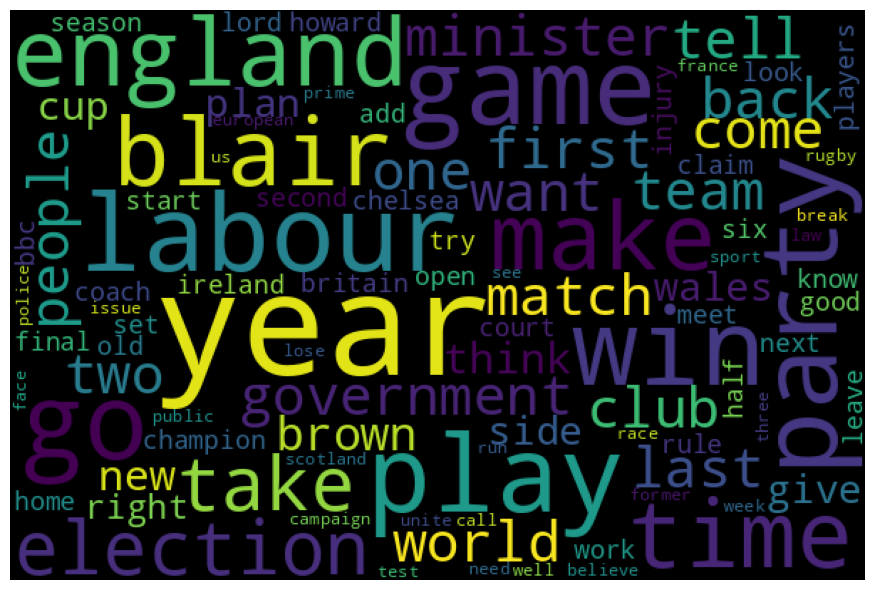

{'game': 37.344596754550075,
 'play': 34.45931403243368,
 'labour': 33.81485436909325,
 'win': 33.354597655691805,
 'party': 31.867469957930464,
 'go': 31.562380289515293,
 'get': 29.814644486115004,
 'england': 29.56885856715092,
 'make': 28.638960448832616,
 'time': 28.463167095780207,
 'blair': 28.127759489700534,
 'election': 28.116853337982562,
 'take': 27.360729818847723,
 'government': 27.29640173742445,
 'back': 25.43394491727928,
 'first': 25.406835103926355,
 'club': 25.384806195595797,
 'tell': 25.35180625819089,
 'minister': 25.145478241551977,
 'match': 24.699627043480273}

In [85]:
word_cloud_LDA(0)
topic_top_words(0)

From the above word cloud and the topic term matrix, we see that the maximum weightage is given to 'game, play, labour, win,party, go, get,' and so on. Therefore, from this we can conclude that the topic is about sport.

#### Topic 1:

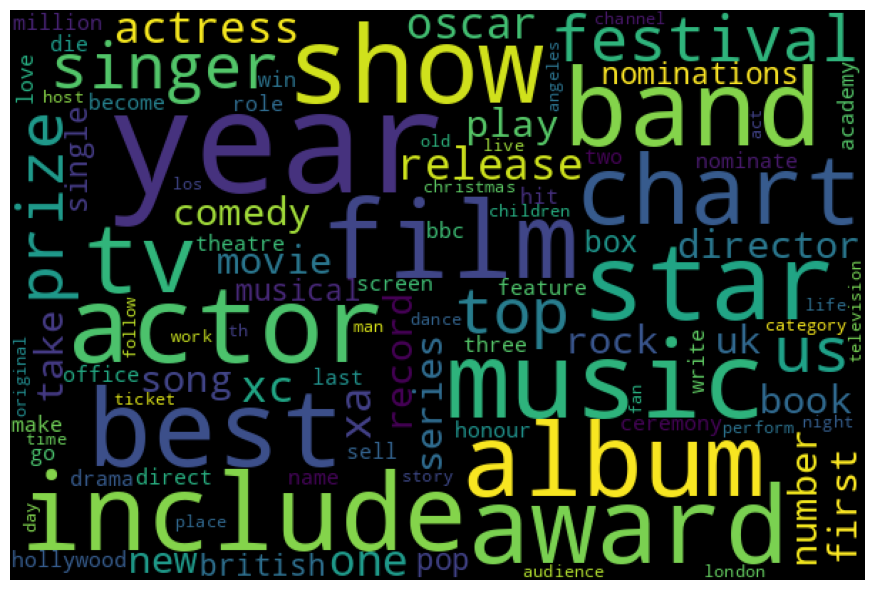

{'film': 53.40766853118376,
 'award': 34.16795256317988,
 'star': 25.119506718518686,
 'best': 24.37069542824456,
 'show': 18.894802926884495,
 'music': 17.51994883109417,
 'band': 16.321833858223243,
 'include': 13.946330846354746,
 'actor': 13.701034003240382,
 'album': 13.155334049820807,
 'chart': 12.824034938475984,
 'tv': 12.542082396512548,
 'festival': 12.454716322333823,
 'year': 12.319740290989905,
 'singer': 11.614751037395889,
 'us': 11.471209128866132,
 'top': 11.195257735194447,
 'prize': 10.921778311177434,
 'release': 10.87009182888369,
 'actress': 10.742388125987986}

In [86]:
word_cloud_LDA(1)
topic_top_words(1)

From the above word cloud and the topic term matrix, we see that the maximum weightage is given to 'film, award, star, show, music, band' and so on. Therefore, from this we can conclude that the topic is about entertainment.

#### Topic 2:

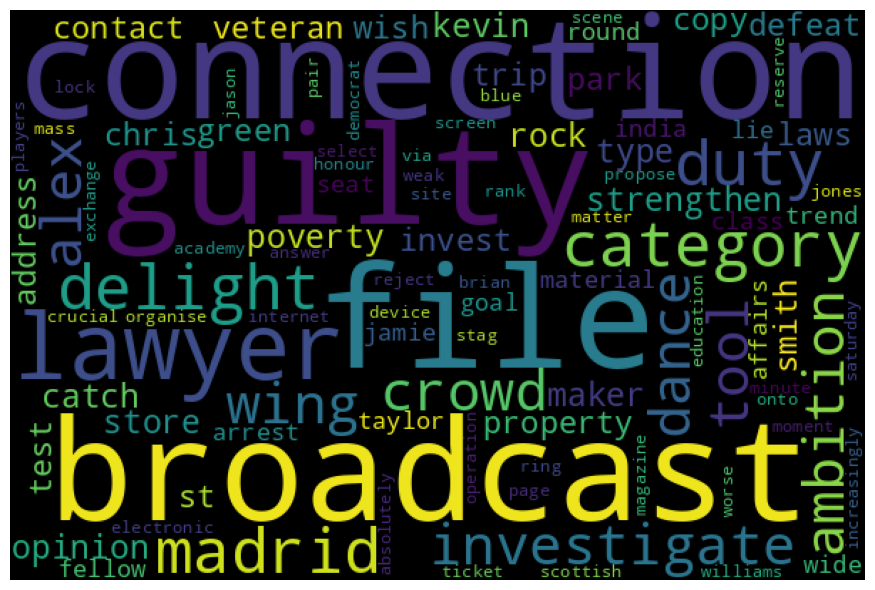

{'connection': 0.20060288266765225,
 'broadcast': 0.20060023507262545,
 'file': 0.20057383697084563,
 'guilty': 0.2005095419184026,
 'lawyer': 0.20050682673890885,
 'category': 0.20048935691312392,
 'duty': 0.20048687224350145,
 'madrid': 0.20047927677423932,
 'delight': 0.2004702495866464,
 'investigate': 0.20046749930882102,
 'tool': 0.2004631591314807,
 'wing': 0.20045385425247947,
 'ambition': 0.20045261277950688,
 'dance': 0.20044960937688427,
 'crowd': 0.20044569047085356,
 'alex': 0.20044112667278863,
 'strengthen': 0.2004355140939531,
 'poverty': 0.20043532597598643,
 'catch': 0.20043532245437448,
 'kevin': 0.2004265205350514}

In [87]:
word_cloud_LDA(2)
topic_top_words(2)

From the above word cloud and the topic term matrix, we see that the maximum weightage is given to 'connection, broadcast, file, guilty,lawyer' and so on. Therefore, from this we can conclude that the topic is about politics.

#### Topic 3:

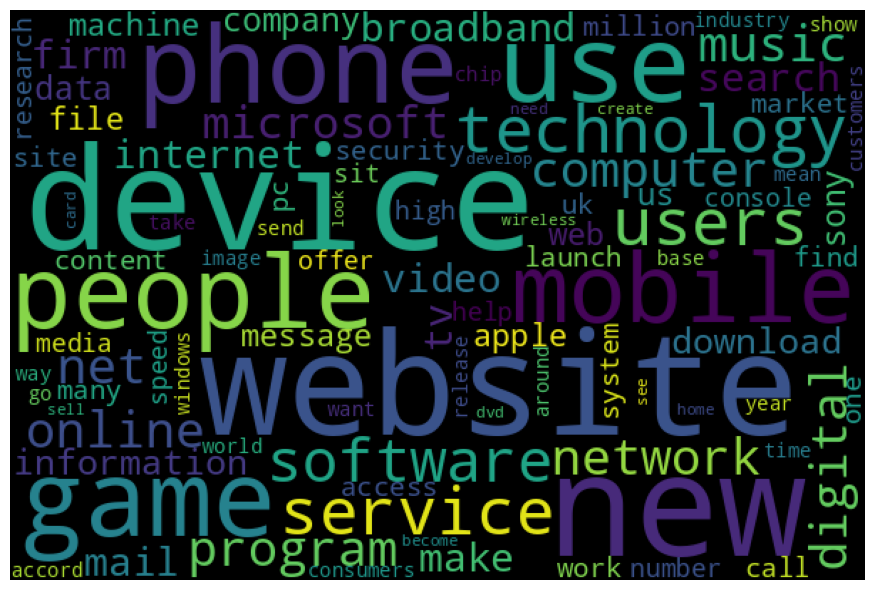

{'use': 26.314188988846556,
 'game': 23.46863550694486,
 'phone': 22.808317215829717,
 'people': 21.450201017823165,
 'mobile': 21.1393876127223,
 'technology': 19.07491015099977,
 'users': 16.587507155783417,
 'service': 16.018823247826525,
 'software': 15.573072044073207,
 'computer': 14.731095803034739,
 'net': 14.474603200940656,
 'digital': 14.304724566322845,
 'online': 14.285981070553683,
 'program': 13.937103287365213,
 'network': 13.86750790074753,
 'music': 13.549221315066601,
 'microsoft': 13.168101269499036,
 'broadband': 13.092595262274836,
 'internet': 12.95351016980952,
 'video': 12.281275872043347}

In [88]:
word_cloud_LDA(3)
topic_top_words(3)

From the above word cloud and the topic term matrix, we see that the maximum weightage is given to 'use, game, phone, people, mobile, technology, users' and so on. Therefore, from this we can conclude that the topic is about tech.

#### Topic 4:

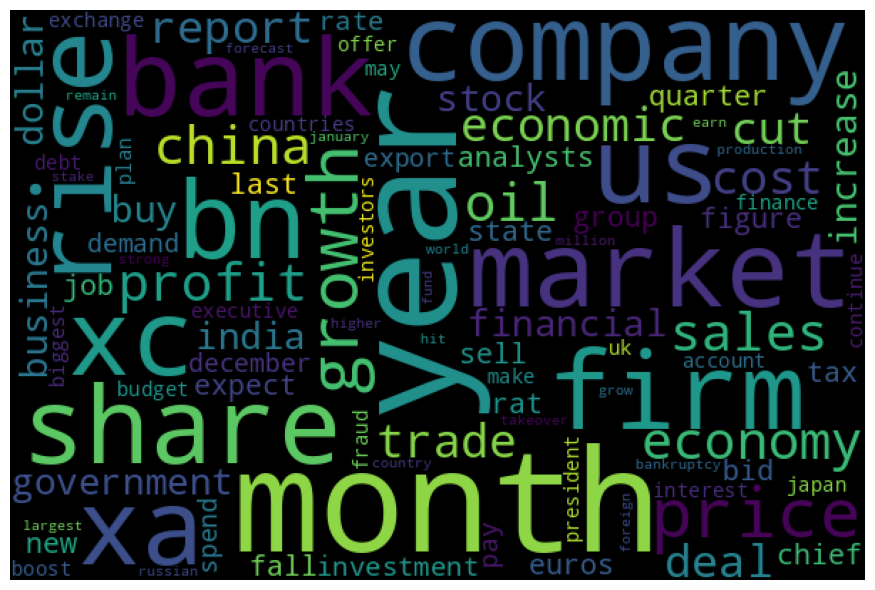

{'bn': 43.74393038840509,
 'company': 30.221104088718892,
 'bank': 27.376727981527846,
 'us': 27.03074876432514,
 'firm': 26.53747067865044,
 'market': 26.20787526469626,
 'xc': 25.220895806192516,
 'xa': 25.19517985668279,
 'share': 24.058781301779444,
 'rise': 23.262638127015162,
 'price': 22.59655020228183,
 'growth': 21.738850486360132,
 'economy': 21.52697895822049,
 'year': 20.486145442173942,
 'sales': 20.146533422251487,
 'oil': 19.604997608740803,
 'profit': 18.92938153726272,
 'china': 17.967148240963933,
 'economic': 17.406115950217735,
 'trade': 16.151318709144746}

In [89]:
word_cloud_LDA(4)
topic_top_words(4)

From the above word cloud and the topic term matrix, we see that the maximum weightage is given to 'bn, company, bank, us, firm, market,' and so on. Therefore, from this we can conclude that the topic is about business.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

* The perplexity score is 2180.565507779986
* The log likelihood value is  -30715.41606016205

Perplexity score is higher in this case when compared to LDA with count vectorizer. Therefore, implementing LDA with count vectorizer gives us the accurate topics and word distribution. Business have negative impact when model with high perplexity is used.

### **ML Model - 2**. Latent Semantic Analysis

Latent Semantic Analysis (LSA) is a technique in topic modeling that analyzes relationships between words in a large body of text to uncover hidden patterns and topics. It captures the relationships based on the singular value decomposition of the document term matrix.

### 1.1 LSA using  count vectorizer

In [90]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.decomposition import TruncatedSVD
# Fit the Algorithm
# create svd instance
svd_cv = TruncatedSVD(n_components=5,random_state=42)

# fit model to data
svd_cv.fit(document_term_matrix)


TruncatedSVD(n_components=5, random_state=42)

In [91]:
# Representating the distribution of topics for each document in the column.
doc_topic_dist_lsa = svd_cv.transform(document_term_matrix)

In [92]:
# Assign each document to the most relevant topic using np.argmax()
assigned_topics_lsa = [np.argmax(topic_distribution) for topic_distribution in doc_topic_dist_lsa]

# Creating a DataFrame with assigned topics
news_LSA = pd.DataFrame({"Document": news_copy['Description'], "Assigned Topic": assigned_topics_lsa})
print(news_LSA)

                                               Document  Assigned Topic
0     aid climate top davos agenda climate change fi...               0
1     healthsouth ex boss go trial former head us me...               0
2     low cost airlines hit eurotunnel channel tunne...               0
3     golden economic period end ten years golden ec...               0
4     europe ask asia euro help european leaders asi...               0
...                                                 ...             ...
2219  domain system scam fear system make easier cre...               0
2220  solutions net security fear fake bank e mail p...               0
2221  bush website block outside us surfers outside ...               0
2223  open source leaders slam patent war word micro...               0
2224  ink help drive democracy asia kyrgyz republic ...               0

[2125 rows x 2 columns]


In [93]:
# Adding category and headline columns from news_copy dataset to news_LDA dataset
news_LSA['Category'] = news_copy['Category']
news_LSA['Title'] = news_copy['Headline']
news_LSA.head(10)

Document  Assigned Topic  \
0  aid climate top davos agenda climate change fi...               0   
1  healthsouth ex boss go trial former head us me...               0   
2  low cost airlines hit eurotunnel channel tunne...               0   
3  golden economic period end ten years golden ec...               0   
4  europe ask asia euro help european leaders asi...               0   
5  uk young top euro earn league british children...               0   
6  us budget deficit reach bn us budget deficit s...               0   
7  eu probe alitalia state aid european commissio...               0   
8  imf agree fresh turkey fund turkey agree draft...               0   
9  swiss cement firm buy spree swiss cement firm ...               0   

   Category                               Title  
0  business   Aids and climate top Davos agenda  
1  business   HealthSouth ex-boss goes on trial  
2  business    Low-cost airlines hit Eurotunnel  
3  business   \'Golden economic period\' to end  
4  business      Europe asks Asia for euro help  
5  business   UK young top Euro earnings league  
6  business   US budget deficit to reach $368bn  
7  business  EU to probe Alitalia \'state aid\'  
8  business     IMF agrees fresh Turkey funding  
9  business   Swiss cement firm in buying spree

In [94]:
# Representing the count of topic with respect to title
news_LSA.groupby('Assigned Topic')['Title'].count()

Assigned Topic
0    2001
1      15
2      65
3      30
4      14
Name: Title, dtype: int64

Here from the output of above cell, we notice that maximum documents are assigned topic 0 and remaining documents are least distributed to other topics. LSA with count vectorizer doesnt give us the accurate topic document distribution.

### 1.2 LSA using  TF-IDF vectorizer

In [95]:
# Fit the Algorithm
# create svd instance
svd_tfidf = TruncatedSVD(n_components=5,random_state=42)

# fit model to data
svd_tfidf.fit(doc_matrix_TFIDF)

TruncatedSVD(n_components=5, random_state=42)

In [96]:
# Representating the distribution of topics for each document in the column.
doc_topic_dist_lsa = svd_cv.transform(doc_matrix_TFIDF)

In [97]:
# Assign each document to the most relevant topic using np.argmax()
assigned_topics_lsa = [np.argmax(topic_distribution) for topic_distribution in doc_topic_dist_lsa]

# Creating a DataFrame with assigned topics
news_LSA_tf = pd.DataFrame({"Document": news_copy['Description'], "Assigned Topic": assigned_topics_lsa})
print(news_LSA_tf)

                                               Document  Assigned Topic
0     aid climate top davos agenda climate change fi...               0
1     healthsouth ex boss go trial former head us me...               0
2     low cost airlines hit eurotunnel channel tunne...               0
3     golden economic period end ten years golden ec...               0
4     europe ask asia euro help european leaders asi...               0
...                                                 ...             ...
2219  domain system scam fear system make easier cre...               0
2220  solutions net security fear fake bank e mail p...               0
2221  bush website block outside us surfers outside ...               0
2223  open source leaders slam patent war word micro...               0
2224  ink help drive democracy asia kyrgyz republic ...               0

[2125 rows x 2 columns]


In [98]:
# Adding category and headline columns from news_copy dataset to news_LDA dataset
news_LSA_tf['Category'] = news_copy['Category']
news_LSA_tf['Title'] = news_copy['Headline']
news_LSA_tf.head(10)

Document  Assigned Topic  \
0  aid climate top davos agenda climate change fi...               0   
1  healthsouth ex boss go trial former head us me...               0   
2  low cost airlines hit eurotunnel channel tunne...               0   
3  golden economic period end ten years golden ec...               0   
4  europe ask asia euro help european leaders asi...               0   
5  uk young top euro earn league british children...               0   
6  us budget deficit reach bn us budget deficit s...               0   
7  eu probe alitalia state aid european commissio...               0   
8  imf agree fresh turkey fund turkey agree draft...               0   
9  swiss cement firm buy spree swiss cement firm ...               0   

   Category                               Title  
0  business   Aids and climate top Davos agenda  
1  business   HealthSouth ex-boss goes on trial  
2  business    Low-cost airlines hit Eurotunnel  
3  business   \'Golden economic period\' to end  
4  business      Europe asks Asia for euro help  
5  business   UK young top Euro earnings league  
6  business   US budget deficit to reach $368bn  
7  business  EU to probe Alitalia \'state aid\'  
8  business     IMF agrees fresh Turkey funding  
9  business   Swiss cement firm in buying spree

In [99]:
# Representing the count of topic with respect to title
news_LSA_tf.groupby('Assigned Topic')['Title'].count()

Assigned Topic
0    1914
1      19
2      83
3      67
4      42
Name: Title, dtype: int64

When LSA with TF-IDF is implemented on the dataset, we see that most of the documents are assigned to topic 0 which is inappropriate. Hence, it is not suggestable to use this model for topic modeling.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

* Perplexity score is considered as the evaluation metrics for LDA model implementation. A lower perplexity score indicates a more effective and accurate model, which corresponds to a better business impact. It guarantees that the model provides relevant insights, facilitates better decision-making, and contributes to a better user experience across a wide range of applications and sectors.
* Distribution of topics to the documents in the dataset is verified with the given categories for LSA model implementation.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Among the models used for topic modeling, we have obtained lower perplexity score for LDA with count vectorizer. Hence, we choose LDA to be the final prediction model.

# **Conclusion**

First we performed feature engineering which involves majorly a text pre-processing since the dataset is completely of text.
* In expand contractions section, we have imported contractions library to expand the words.
* Then we converted the entire text to lower case so that consistency is maintained.
* Then we removed punctuations, digits, and whitespaces.
* To obtain proper accuracy we have removed most frequently used words which are called as stop words.
* Tokenization is performed to the text and visualized the top 10 most frequently used words.
* Now we normalised the text column using lemmatizer so that similar words are replaced by a one common meaningful word.
* Then vecrorization is perfomed for the text using both count vectorizer and TF-IDF vectorizer.
* Finally coming to the model implementation and their respective evaluation metrics. Here we considered perplexity score as evaluation metrics for LDA and distribution of topics to documents for LSA.
1. LDA with count vectorizer
* perplexity score - 748.620
2. LDA with TF-IDF vectorizer
* perplexity score - 2180.565
3. LSA with count vectorizer
* 0    2001
* 1      15
* 2      65
* 3      30
* 4      14
4. LSA with TF-IDF vectorizer
* 0    1914
* 1      19
* 2      83
* 3      67
* 4      42

Therefore, On comparing the models built, we noticed that LDA with count vectorizer performed better with low perplexity score. Also, looking at the topic distribution LDA has assigned topics accurately with high accuracy.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***